# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Теперь когда преобработка данных проведена проверим гипотезы для построении модели кредитного скоринга.
Согласно гипотезе возврат кредита в срок зависит от:
- количества детей;
- семейного положения;
- уровня дохода;
- цели кредита.

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
pivot_children = data.pivot_table(index=['children'], values='debt', aggfunc={'count','sum'})
pivot_children.columns = ['Всего кредитополучателей', 'Всего должников']
pivot_children['Доля должников в %'] = round(pivot_children['Всего должников'] / pivot_children['Всего кредитополучателей']*100,2)
print(pivot_children.sort_values('Доля должников в %'))

          Всего кредитополучателей  Всего должников  Доля должников в %
children                                                               
5                                9                0                0.00
0                            14091             1063                7.54
3                              330               27                8.18
1                             4808              444                9.23
2                             2052              194                9.45
4                               41                4                9.76


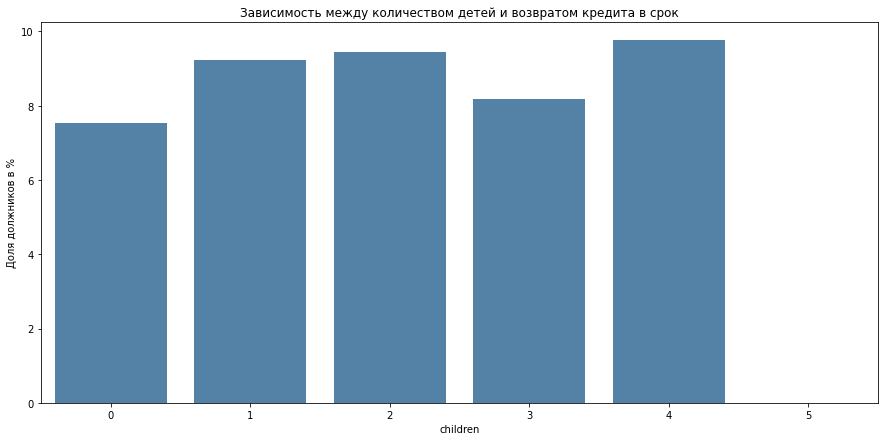

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.barplot(x=pivot_children.index, y=pivot_children['Доля должников в %'], color='steelblue')
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.show()

**Вывод:** Как видно из представленных данных большой корреляции между количеством детей и возвратом креди в срок не наблюдается. Наибольшую долю (9,76%) кредитополучателей, допускающих просрочку кредита составляют семьи с 4 детьми, что может быть вызвано высокой финансовой нагрузкой. Семьи, где 1 или 2 ребенка допускают просрочку чуть реже (9,23% и 9,45% соответсвенно). Доля росрочки кредита у семей с 3 детьми меньше(8,18%), возможно данная категория семей более дисциплинированна. Но в то же время семьи без детей также допускают проску не многим реже (7,54%). Что свидетельствует о том, что наличие детей неглавенствующий фактор, влияющий на возврат кредита в срок. 
    На общем фоне выделяютя семьи с 5 детьми, их дося составила 0%. Но как видим и кредитополучателей среди данной категории составила всего 9. Возможно таким семьям в связи с высокой финансовой нагрузкой не выдают кредит, а те семьи, что его получили имеют достаточный доход на 1 члена семьи и имеют возможность оплачивать все в срок.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
pivot_marriage = data.pivot_table(index=['family_status'], values='debt', aggfunc={'count','sum'})
pivot_marriage.columns = ['Всего заемщиков', 'Всего должников']
pivot_marriage['Доля должников, %'] = round(pivot_marriage['Всего должников'] / pivot_marriage['Всего заемщиков']*100,2)
print(pivot_marriage.sort_values('Доля должников, %'))

In [ ]:
pivot_marriage = pivot_marriage.sort_values('Доля должников, %')
sns.barplot(x=pivot_marriage['Доля должников, %'], y=pivot_marriage.index, color='steelblue')

**Вывод:** Прослеживается некоторая зависимость между возвратом кредита в срок и семейным положением заемщиков.Так наибольшую долю заемщиков, не уплачивающих кредит вовремя составляют люди не состоящие в браке или же люди в гражданском браке (9,76% и 9,31%). Вероятно это вызвано тем, что финансовое бремя у данной категории заемщиков не распределено или ложится только на одного человека. В то время как у заемщиков, состоящих в браке доля невозвратных кредитов составляет 7,56%. Причинами невозврата у этой категории могут быть различными как наличие детей и большая финансовая нагрузка, недостаточная дисциплина в силу возраста или низкий доход. В людей, находящихся в разводе доля просрочки чуть ниже (7,06%). Возможно из-за высокой ответственности или достаточных уровнем дохода, а может быть часть финансовых обязательств бывшие супруги разделили после брака. Самая высокая дисциплина наблюдается у вдовствущей категории (6,62%). Причиной этому может быть более старший возраст и финансовая дисциплина.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Ранее все заемщики были разделены по категориям:

* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

Рассмотрим данные исходя из этого выделения категорий


In [ ]:
pivot_income = data.pivot_table(index=['total_income_category'], values='debt', aggfunc={'count','sum'})
pivot_income.columns = ['Всего заемщиков', 'Всего должников']
pivot_income['Доля должников, %'] = round(pivot_income['Всего должников'] / pivot_income['Всего заемщиков']*100,2)
print(pivot_income.sort_values('Доля должников, %'))

In [ ]:
sns.barplot(x=pivot_income.index, y=pivot_income['Доля должников, %'], color='steelblue')

**Вывод:** Самая высокая доля заемщиков, имеющих задолженность по кредиту имеет доход до 30 тыс. рублей (9,09%) и вероятна связана с низким уровнем дохода. Заемщики с доходом от 50 до 200 тыс. руб. допускают не возврат кредита в срок (8,5%). Это самая большая категория заемщиков и вероятно в нее входит большая доля семей с детьми, возможно имеющих несколько кредитов или иных финансовых обязательств. Заемщики, имеющие доход более 1 млн., несмотря на высокий уровень заработка составляют 8% среди всех должников. С доходом от 200 тыс. руб до 1 млн. доля заемщиков, просрочивших оплату по кредиту меньше на чуть менее 1 проценного пункта (7,06%). Самая низкая просрочка по кредиту наблюдается у людей с доходом 30-50 тыс. руб.(6,02%). Это может быть связано с тем, что возможные штрафы по невыплате кредита в срок будут неподъемны для данной категории заемщиков.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
pivot_purpose = data.pivot_table(index=['purpose_category'], values='debt', aggfunc={'count','sum'})
pivot_purpose.columns = ['Всего заемщиков', 'Всего должников']
pivot_purpose['Доля должников, %'] = round(pivot_purpose['Всего должников'] / pivot_purpose['Всего заемщиков']*100,2)
print(pivot_purpose.sort_values('Доля должников, %'))

In [ ]:
pivot_purpose = pivot_purpose.sort_values('Доля должников, %')
sns.barplot(x=pivot_purpose['Доля должников, %'], y=pivot_purpose.index, color='steelblue')


**Вывод:** Наибольшую долю должников составляю заемщики, взявшие  кредит на получение образования и операции с автомобилем (9,25% и 9,35% соответственно). Кредиты на проведение свадьбы возвращают в срок чаще (7,91%), возможно это связано с меньшей суммой кредита. Кроме того, в данном случае имеет место быть большая ответственность и разделение финансовых обязательств людей, стремящихся создать семью. Самая низкая доля просрочки у людей, берущих кредит на недвижимость (7,26%). Возможно это связано с тем, что люди, которые берут кредит на покупку недвижимости в силу ее высокой стоимости обладают достаточным уровнем дохода, ответственности и несут в целом большие риски в случае неуплаты кредита, что приводит к большей ответственности.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в данных есть в столбцах days_employed и total_income. Вероятно это связано с чеовеческим фактором, люди просто не хотели заполнять информацию о доходе и сроке занятости. Кроме того, стоит отметить что количество пропусков в этих столбцах одинаковы.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* С помощью медианы можно получить более точные данные и правильнее интерпретировать статистику, в то время как исключение из данных пропусков может, в случае с количественными переменными, исказить данные.На среднее арифметическое значение могут оказать большее влияние выбросы.

### Шаг 4: общий вывод.

Корреляция по выдвинутым гипотезом прослеживается невысокая. Вероятнее, что на возврат кредита в срок больше влияет совокупность факторов. Так, исходя из полученных данных с большей вероятностью просрочку кредита допустит заемщики не состоящие в браке или состоящие в гражданском браке, имеющие 4 детей, с доходом менее 30 тыс. рублей, получающие кредит на операции с автомобилем или получение образования.
В то время как самыми благонадежными заемщиками будут вдовы/вдовцы, получившие кредит на операции с недвижимостью без детей, с доходом 30-50 тыс. руб.
Не обязательно наличие всех этих факторов, возможно наличие некоторых из них.
Возможно потребуется выдвижение дополнительных гипотез или большая выборка, основываясь на существующих выводах для выявления больших взаимосвязей.